<b><h2>1. Import Module Yang Dibutuhkan</h2></b>

In [62]:
#Berisi proses import berbagai library penting yang digunakan dalam proyek,
#meliputi modul untuk pemrosesan data (NumPy, OpenCV), visualisasi (Matplotlib),
#serta komponen machine learning seperti model Sequential dan layer-layer dari TensorFlow Keras.
#Library sklearn digunakan untuk pembagian dataset, encoding label, dan evaluasi performa model.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt


In [63]:
# Melakukan proses mounting Google Drive agar data dan file pada Drive dapat diakses langsung di lingkungan Google Colab.
from google.colab import drive
drive.mount('/content/drives/')

Drive already mounted at /content/drives/; to attempt to forcibly remount, call drive.mount("/content/drives/", force_remount=True).


<b><h2>2. Load Dataset</h2></b>

In [65]:
#Menginisialisasi path direktori dataset serta daftar label untuk klasifikasi citra daun.
#list kosong disiapkan untuk menampung data citra dan label hasil pemrosesan.
imagePaths = '/content/drives/MyDrive/Data/DatasetDaun'
label_list = ['Nangka', 'Daun Sirih']
data = []
labels = []

<b><h2>3. Data Preprocessing</h2></b>

In [66]:
#Melakukan pembacaan citra dari folder dataset menggunakan OpenCV
# Setiap gambar diubah ukurannya menjadi 32x32 piksel
# kemudian disimpan ke dalam list data beserta label kategorinya
# Langkah ini membentuk dataset mentah untuk tahap pelatihan

for label in label_list:
    image_dir = imagePaths+'/'+label+'/*.jpg'
    print(f"Looking for images in: {image_dir}") # Add this line to print the path
    for imagePath in glob.glob(image_dir):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

Looking for images in: /content/drives/MyDrive/Data/DatasetDaun/Nangka/*.jpg
Looking for images in: /content/drives/MyDrive/Data/DatasetDaun/Daun Sirih/*.jpg


In [67]:
#Mengecek bentuk atau dimensi array data yang telah dikumpulkan untuk memastikan proses pembacaan dan penyimpanan citra berhasil.
np.array(data).shape


(102, 32, 32, 3)

In [68]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)


In [69]:
print(labels)


['Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun 

In [70]:
# Melakukan proses encoding terhadap label kategori menggunakan LabelEncoder agar label berbentuk teks dapat diubah menjadi format numerik yang dikenali oleh model.
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<b><h2>4. Split Dataset</h2></b>

In [72]:
#Membagi dataset menjadi data latih dan data uji dengan proporsi tertentu

x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42)

In [77]:
#Melakukan operasi tambahan yang mendukung alur utama proyek, seperti verifikasi hasil atau penyesuaian parameter.

print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)


Ukuran data train = (81, 32, 32, 3)
Ukuran data test = (21, 32, 32, 3)


<b><h2>5. Build CNN Architecture</h2></b>

In [78]:
# Mendefinisikan arsitektur model CNN menggunakan Sequential API
# Model terdiri dari beberapa lapisan konvolusi, pooling, dan fully connected yang dirancang untuk mengekstraksi fitur dan melakukan klasifikasi citra daun.

model = Sequential()
# Extracted Feature Layer
model.add(InputLayer(input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=50, kernel_size=2, strides=1,
          padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [79]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 50)     │         6,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,638,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,646,291 (6.28 MB)

 Trainable params: 1,646,291 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# menentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)


In [81]:
# Mengompilasi model dengan menentukan optimizer, fungsi loss, dan metrik evaluasi. Langkah ini menyiapkan model agar siap untuk proses pelatihan.
model.compile(loss='binary_crossentropy',
              optimizer=opt_funct,
              metrics=['accuracy'])


<b><h2>6. Training Model</h2></b>

In [82]:
# Menjalankan proses pelatihan model menggunakan data latih dan label-nya
# Proses ini mengoptimalkan bobot jaringan agar mampu mengenali pola citra daun dengan baik

H = model.fit(x_train, y_train, validation_data=(x_test, y_test),
              epochs=max_epochs, batch_size=32)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.6205 - loss: 0.7339 - val_accuracy: 0.3810 - val_loss: 1.3368
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5837 - loss: 0.8011 - val_accuracy: 0.6190 - val_loss: 0.5464
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5031 - loss: 0.6516 - val_accuracy: 0.8571 - val_loss: 0.4656
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8719 - loss: 0.4254 - val_accuracy: 0.4762 - val_loss: 0.6496
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6839 - loss: 0.4831 - val_accuracy: 0.8095 - val_loss: 0.4276
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8819 - loss: 0.3345 - val_accuracy: 1.0000 - val_loss: 0.2920
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9037 - loss: 0.2975 - val_accuracy: 0.9048 - val_loss: 0.2396
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9620 - loss: 0.2230 - val_accuracy: 0.8095 - val_loss

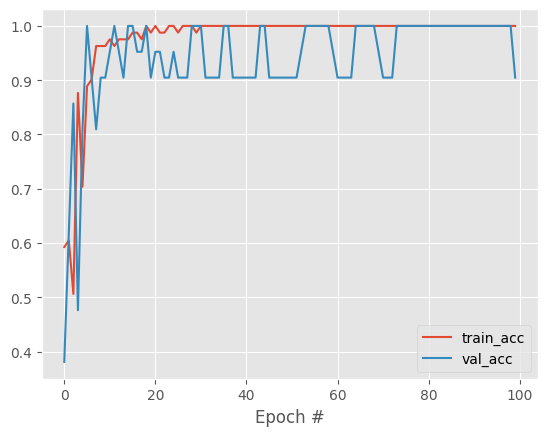

In [83]:
# Melakukan visualisasi hasil pelatihan model atau menampilkan contoh citra dari dataset
# Visualisasi ini membantu dalam memahami performa model secara intuitif

N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
# plt.plot(N, H.history["loss"], label="train_loss")
# plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()


<b><h2>7. Evaluasi Model</h2></b>

In [84]:
# Menampilkan laporan klasifikasi yang berisi metrik evaluasi seperti precision, recall, dan f1-score untuk menilai performa model pada setiap kelas.
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(int)
print(classification_report(y_test, target, target_names=label_list))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
              precision    recall  f1-score   support

      Nangka       0.80      1.00      0.89         8
  Daun Sirih       1.00      0.85      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.92      0.90        21
weighted avg       0.92      0.90      0.91        21



<b><h2>8. Testing Model</h2></b>

In [86]:
# uji model menggunakan image lain
queryPath = imagePaths+'/Daun Sirih/018.jpg' # Changed to Daun Sirih
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)

print(q_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[1.9141615e-07]]


<b><h2>9. Hasil</h2></b>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Daun Nangka Test:


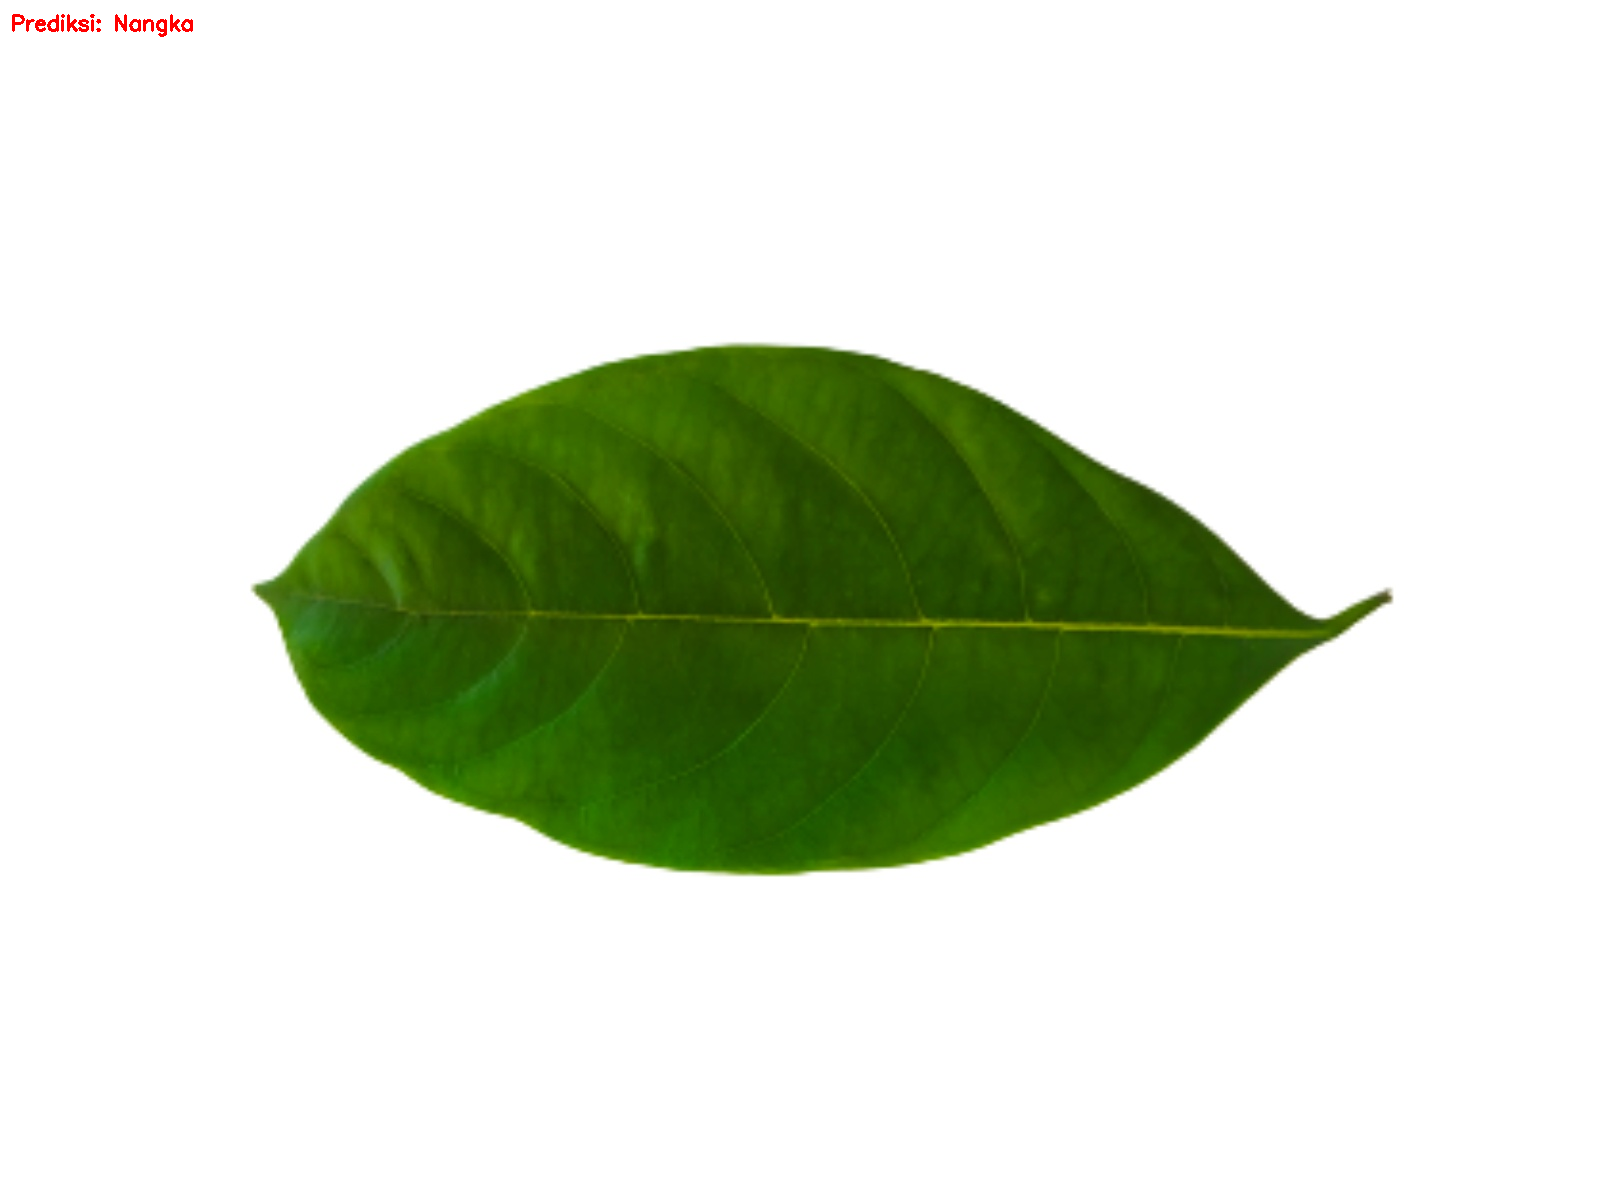


Daun Sirih Test:


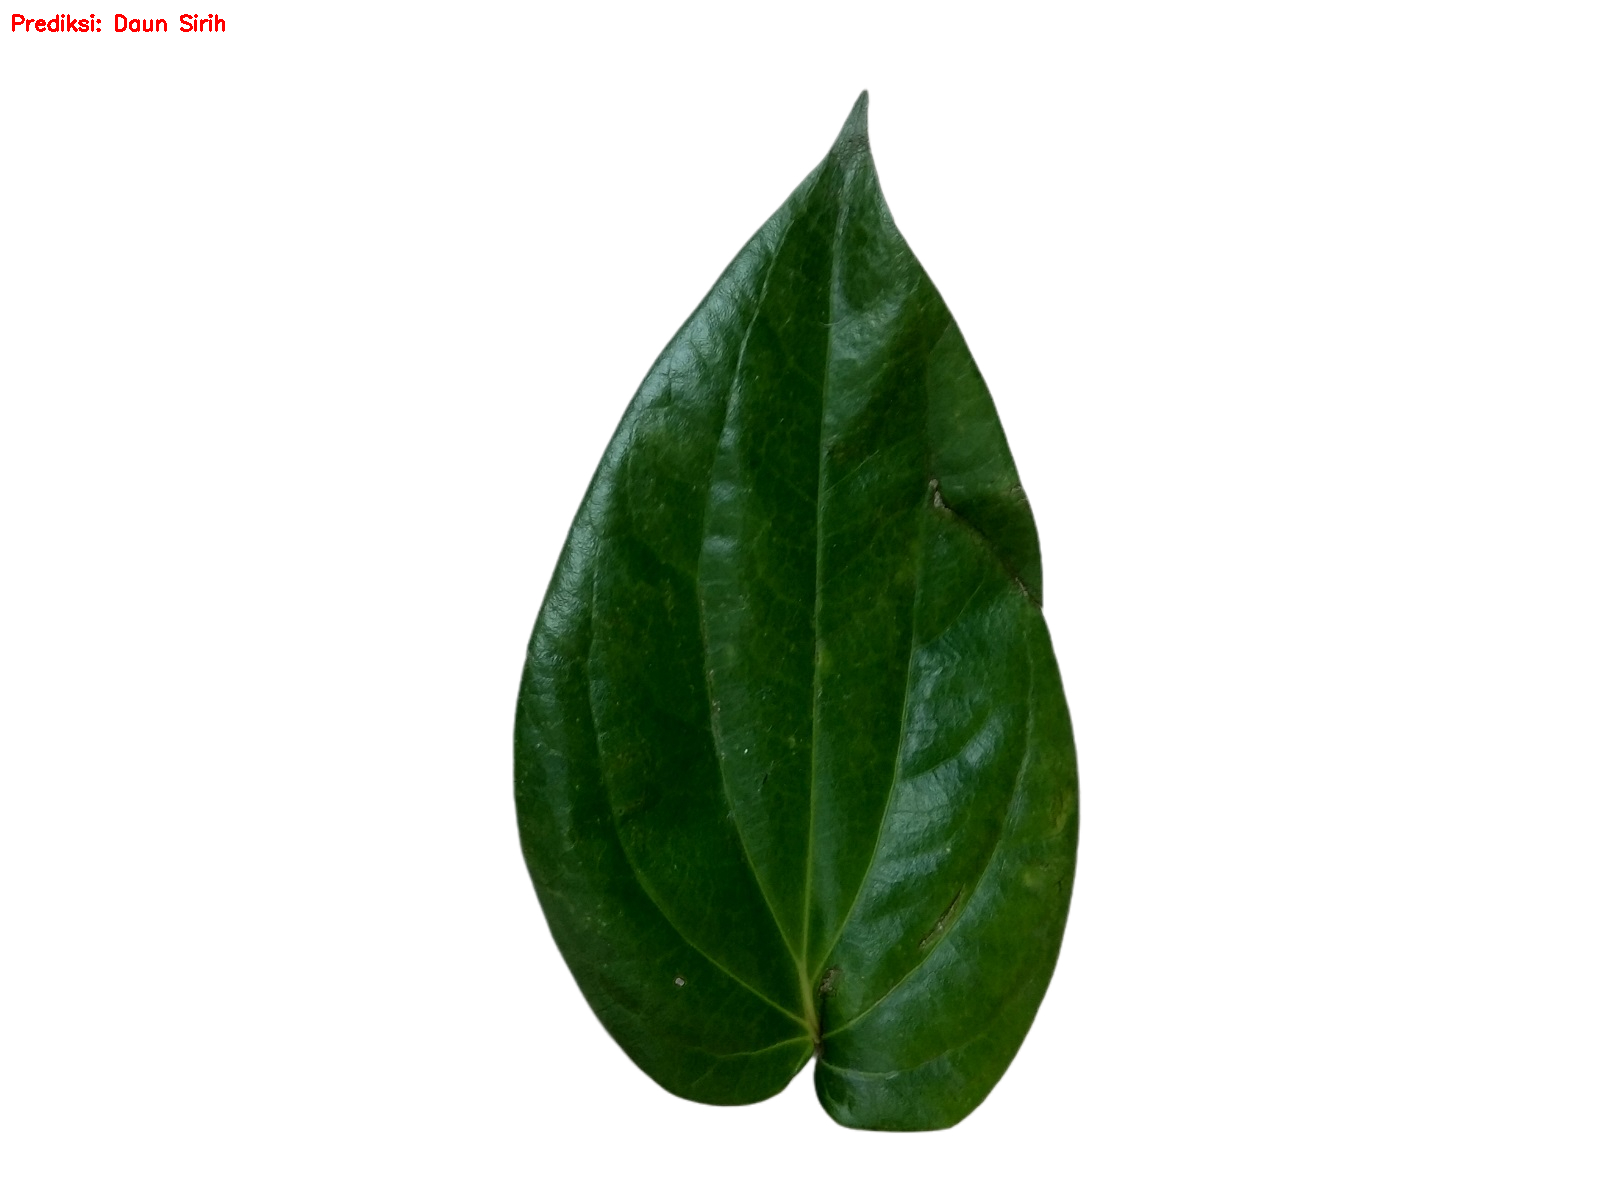

In [88]:
# Test with a "Daun Nangka" image
imagePaths = '/content/drives/MyDrive/Data/DatasetDaun' # Added this line
queryPath_nangka = imagePaths+'/Nangka/018.jpg'
query_nangka = cv2.imread(queryPath_nangka)
output_nangka = query_nangka.copy()
query_nangka_resized = cv2.resize(query_nangka, (32, 32))
q_nangka = []
q_nangka.append(query_nangka_resized)
q_nangka = np.array(q_nangka, dtype='float') / 255.0

q_pred_nangka = model.predict(q_nangka)

if q_pred_nangka <= 0.5:
    target_nangka = "Daun Sirih"
else:
    target_nangka = "Nangka"
text_nangka = "Prediksi: {}".format(target_nangka)
cv2.putText(output_nangka, text_nangka, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Test with a "Daun Sirih" image
queryPath_sirih = imagePaths+'/Daun Sirih/018.jpg'
query_sirih = cv2.imread(queryPath_sirih)
output_sirih = query_sirih.copy()
query_sirih_resized = cv2.resize(query_sirih, (32, 32))
q_sirih = []
q_sirih.append(query_sirih_resized)
q_sirih = np.array(q_sirih, dtype='float') / 255.0

q_pred_sirih = model.predict(q_sirih)

if q_pred_sirih <= 0.5:
    target_sirih = "Daun Sirih"
else:
    target_sirih = "Nangka"
text_sirih = "Prediksi: {}".format(target_sirih)
cv2.putText(output_sirih, text_sirih, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# Display both images
print("Daun Nangka Test:")
from google.colab.patches import cv2_imshow
cv2_imshow(output_nangka)

print("\nDaun Sirih Test:")
cv2_imshow(output_sirih)

In [89]:
# model.save('image_classification.h5')

**Menambahkan algoritma Transfer Learning (MobileNetV2)**



menggunakan model CNN besar yang sudah dilatih di dataset besar (ImageNet), lalu fine-tune pakai dataset daun.

In [90]:
# Berisi proses import berbagai library penting yang digunakan dalam proyek

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False  # Bekukan layer dasar

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model_tl = Model(inputs=base_model.input, outputs=output)
model_tl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

H_tl = model_tl.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)


/tmp/ipython-input-3656405177.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 920ms/step - accuracy: 0.4963 - loss: 0.7169 - val_accuracy: 0.7619 - val_loss: 0.6807
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8618 - loss: 0.6678 - val_accuracy: 0.6667 - val_loss: 0.6676
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7951 - loss: 0.6290 - val_accuracy: 0.5238 - val_loss: 0.6584
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7158 - loss: 0.5934 - val_accuracy: 0.5238 - val_loss: 0.6514
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7565 - loss: 0.5552 - val_accuracy: 0.5238 - val_loss: 0.6451
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7063 - loss: 0.5343 - val_accuracy: 0.5238 - val_loss: 0.6369
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7717 - loss: 0.5209 - val_accuracy: 0.5238 - val_loss: 0.6267
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8433 - loss: 0.4714 - val_accuracy: 0.5238 - val_loss: 0.6165

**Menambahkan Algoritma Evaluasi Confusion Matrix dan Classification Report**

Menambahkan algoritma evaluasi agar kita bisa tahu performa tiap kelas (bukan hanya akurasi total).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.85      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.92      0.90        21
weighted avg       0.92      0.90      0.91        21



<Axes: >

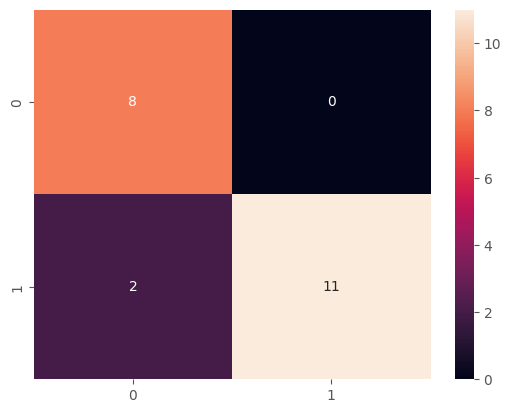

In [91]:
# Menampilkan laporan klasifikasi yang berisi metrik evaluasi seperti precision, recall, dan f1-score untuk menilai performa model pada setiap kelas.

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

pred = (model.predict(x_test) > 0.5).astype("int32")

print(classification_report(y_test, pred))

sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d")
